# Mae's Covid-19 Dashboard

In [14]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [15]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [16]:
with open("occupiedBedSeries.json", "r") as INFILE:
    jsondata=json.load(INFILE)

In [17]:
#jsondata={}

In [18]:
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")

def wrangle_data(rawdata):
    datalist=rawdata['data']
    dates=[dictionary['date'] for dictionary in datalist]
    dates.sort()
    startdate=parse_date(dates[0])
    enddate=parse_date(dates[-1])
    index=pd.date_range(startdate, enddate, freq='D')
    occupiedBedSeriesdf=pd.DataFrame(index=index, columns=['hospitalAdmissions', 'occupiedBeds'])
    for entry in datalist: 
        date=parse_date(entry['date'])
        for column in ['hospitalAdmissions', 'occupiedBeds']:
            if pd.isna(occupiedBedSeriesdf.loc[date, column]): 
                value= float(entry[column]) if entry[column]!=None else 0.0
                occupiedBedSeriesdf.loc[date, column]=value
    occupiedBedSeriesdf.fillna(0.0, inplace=True) 
    return occupiedBedSeriesdf

occupiedBedSeriesdf=wrangle_data(jsondata)

## Download Most Recent Data

Click the download button below to refresh and update the data shown in the interactive graph below. This will update the most current data from the UK government, published by Public Health England.

In [19]:
def access_api():
    filters = [
    'areaType=overview'
    ]
    structure = {
    "date": "date",
    "hospitalAdmissions": "newAdmissions",
    "occupiedBeds": "covidOccupiedMVBeds"
    }
    api = Cov19API(filters=filters, structure=structure)
    occupiedBedSeries = api.get_json()
    return occupiedBedSeries

In [20]:
def refreshButton(button):
    apidata=access_api()
    global occupiedBedSeriesdf
    occupiedBedSeriesdf=wrangle_data(apidata)
    apibutton.icon="check"
    plt.show()

apibutton=wdg.Button(
    description='Refresh Data',
    disabled=False,
    button_style='info',
    tooltip='Click to download current Public Health England data',
    icon='download'
)

apibutton.on_click(refreshButton)
display(apibutton)
plt.show()

Button(button_style='info', description='Refresh Data', icon='download', style=ButtonStyle(), tooltip='Click t…

## Comparing Number of Hospital Admissions to Number of Occupied Ventilator Beds

The interactive graph below demonstrates a comparison between hospital admissions and occupied ventilator beds in UK hospitals between 2020 and 2022.
* the x axis demonstrates the dates beginning from April 2020 to most recent data
* the y axis demonstrates the number of cases (0-4,000+)
* there is also a standard graph under the interactive graph that shows both categories overlapped for your convenience
* ALL DATA is pulled from the Public Health England cited in the link at the bottom of this page

In [21]:
def plot_bedavailability(occupiedNoBeds):
    occupiedBedSeriesdf[occupiedNoBeds].plot() 
    plt.show()
    
hospitalstats=wdg.Dropdown(
    options=['hospitalAdmissions', 'occupiedBeds'],
    value='hospitalAdmissions',
    description='View:',
    disabled=False,
)

def beds_graph():
    current=hospitalstats.value
    if current==hospitalstats.options[0]:
        other=hospitalstats.options[1]
    else:
        other=hospitalstats.options[0]
    hospitalstats.value=other 
    hospitalstats.value=current 
    

graph=wdg.interactive_output(plot_bedavailability, {'occupiedNoBeds': hospitalstats})
display(hospitalstats, graph)

Dropdown(description='View:', options=('hospitalAdmissions', 'occupiedBeds'), value='hospitalAdmissions')

Output()

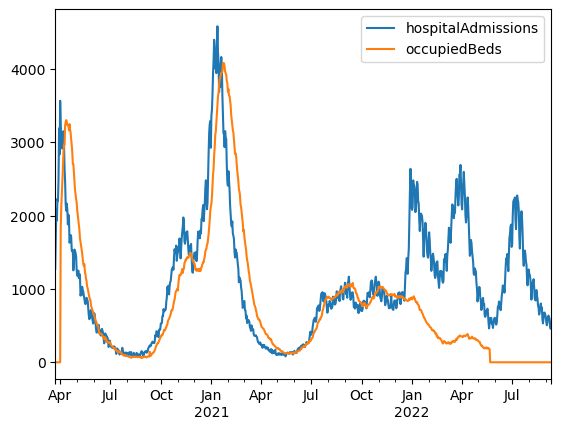

In [22]:
occupiedBedSeriesdf.plot()
plt.show()

## View on GitHub 

To view the code of this page, visit my [GitHub](https://github.com/) page. Thank you!

**Author and Copyright Notice** This data was wrangled, munged, and plotted by Mae Anderson.

Acknowledgement of the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*